In [1]:
import sys
import numpy as np
import torch
from pathlib import Path
import matplotlib.pyplot as plt
import nibabel as nib
import pandas as pd
sys.path.append("/workspace/repositories/DSSQ/src")
from datasets import MnMDataset, MultisiteMRIProstateDataset

In [2]:
data_path = Path("/data/Data/MNM").resolve()
data_path_p = Path("/data/Data/PMRI").resolve()

In [3]:
ds = MnMDataset(data_path, "siemens", split="train", load_only_present=True, format="torch")
# ds_p = MultisiteMRIProstateDataset(data_path_p, "siemens", split="train", load_only_present=True, format="torch")

    # """ """

    # def __init__(
        # self,
        # datapath,
        # vendor,
        # split="all",
        # load_only_present=False,
        # format="torch",
        # transform=None,
        # subset=False,
        # one_class=False,
        # seed=42,
    # ):
        # assert vendor in ["siemens", "ge", "philips"], "Invalid vendor"

KeyboardInterrupt: 

In [4]:
len(ds) # , len(ds_p)

(1050, 986)

In [5]:
ds[0]["input"].shape, ds[0]["target"].shape, ds_p[0]["input"].shape, ds_p[0]["target"].shape

(torch.Size([1, 256, 256]),
 torch.Size([1, 256, 256]),
 torch.Size([1, 384, 384]),
 torch.Size([1, 384, 384]))

In [3]:
info = pd.read_csv(data_path / "dataset_information.csv", index_col=0)

In [18]:
counter = 0
for sc in info.SCANNER.unique():
    l = len(info[info.SCANNER == sc])
    if sc != "SymphonyTim":
        counter += l
        print(sc, l)
    else:
        print(sc, l)

SIGNA EXCITE 27
Achieva 88
SymphonyTim 151
Symphony 21
TrioTim 5
Avanto Fit 37
Signa HDxt 25
Avanto 5
Signa Explorer 1


In [19]:
counter

209

In [15]:
info.FIELD.unique()

array([1.5, 3. ])

In [12]:
info.columns

Index(['DISEASE', 'VENDOR', 'SCANNER', 'FIELD'], dtype='object')

In [11]:
vendors = info['VENDOR'].unique()
vendors

array(['GE MEDICAL SYSTEMS', 'Philips Medical Systems', 'SIEMENS'],
      dtype=object)

In [7]:
files = {}
for i in range(1, len(info) + 1):
    case_path = data_path / "dataset" / f"{i:03d}"
    sa_ed = case_path / f"{i:03d}_SA_ED.nii.gz"
    sa_ed_gt = case_path / f"{i:03d}_SA_ED_gt.nii.gz"
    sa_es = case_path / f"{i:03d}_SA_ES.nii.gz"
    sa_es_gt = case_path / f"{i:03d}_SA_ES_gt.nii.gz"
    files[i] = {
        "sa_ed" : {
            "img": nib.load(sa_ed).get_fdata(),
            "seg": nib.load(sa_ed_gt).get_fdata()
        },
        "sa_es" : {
            "img": nib.load(sa_es).get_fdata(),
            "seg": nib.load(sa_es_gt).get_fdata()
        }
    }

In [11]:
shapes_es = {}
shapes_ed = {}
for i in range(1, len(info) + 1):
    shapes_ed[files[i]["sa_ed"]["img"].shape[:2]] = shapes_ed.get(files[i]["sa_ed"]["img"].shape[:2], 0) + 1
    shapes_es[files[i]["sa_es"]["img"].shape[:2]] = shapes_es.get(files[i]["sa_es"]["img"].shape[:2], 0) + 1

In [16]:
shapes_ed

{(256, 256): 32,
 (320, 320): 81,
 (336, 336): 9,
 (352, 352): 10,
 (240, 196): 92,
 (256, 208): 66,
 (196, 240): 22,
 (256, 216): 2,
 (256, 232): 1,
 (192, 240): 1,
 (208, 256): 3,
 (512, 512): 19,
 (384, 384): 4,
 (256, 210): 14,
 (210, 256): 2,
 (288, 238): 1,
 (240, 204): 1}

In [17]:
def get_case_info(files, idx):
    for key, value in files[idx].items():
        print(key)
        print("Image shape", value["img"].shape)
        print("Segmentation shape", value["seg"].shape)
        print("Unique values in segmentation", np.unique(value["seg"]))

def plot_case(files, idx, type="ed"):
    sa_image = files[idx][f"sa_{type}"]["img"]
    sa_gt = files[idx][f"sa_{type}"]["seg"]
    fig, axes = plt.subplots(12, 2, figsize=(10, 30))
    fig.suptitle('SA Slices and Ground Truths', fontsize=16)
    for i in range(12):
        # Plot the image slice
        axes[i, 0].imshow(sa_image[:, :, i], cmap='gray')
        axes[i, 0].set_title(f'Slice {i+1} Image')
        axes[i, 0].axis('off')  # Hide axes ticks

        # Plot the ground truth slice
        axes[i, 1].imshow(sa_gt[:, :, i], cmap='gray')
        axes[i, 1].set_title(f'Slice {i+1} GT')
        axes[i, 1].axis('off')  # Hide axes ticks

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
    plt.show()

sa_ed
Image shape (256, 256, 12)
Segmentation shape (256, 256, 12)
Unique values in segmentation [0. 1. 2. 3.]
sa_es
Image shape (256, 256, 12)
Segmentation shape (256, 256, 12)
Unique values in segmentation [0. 1. 2. 3.]


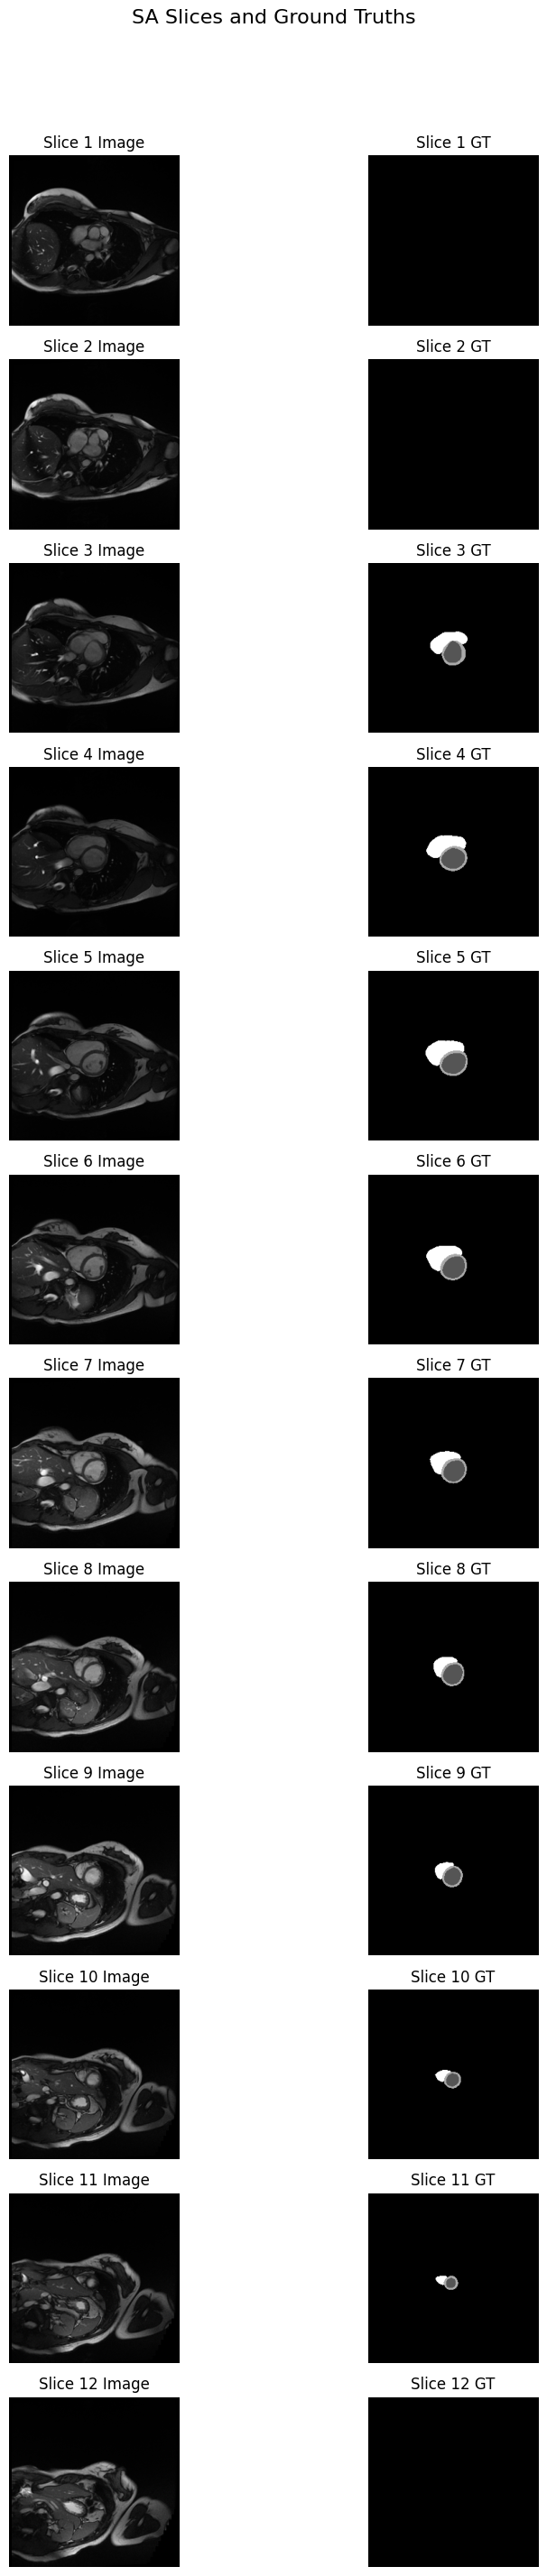

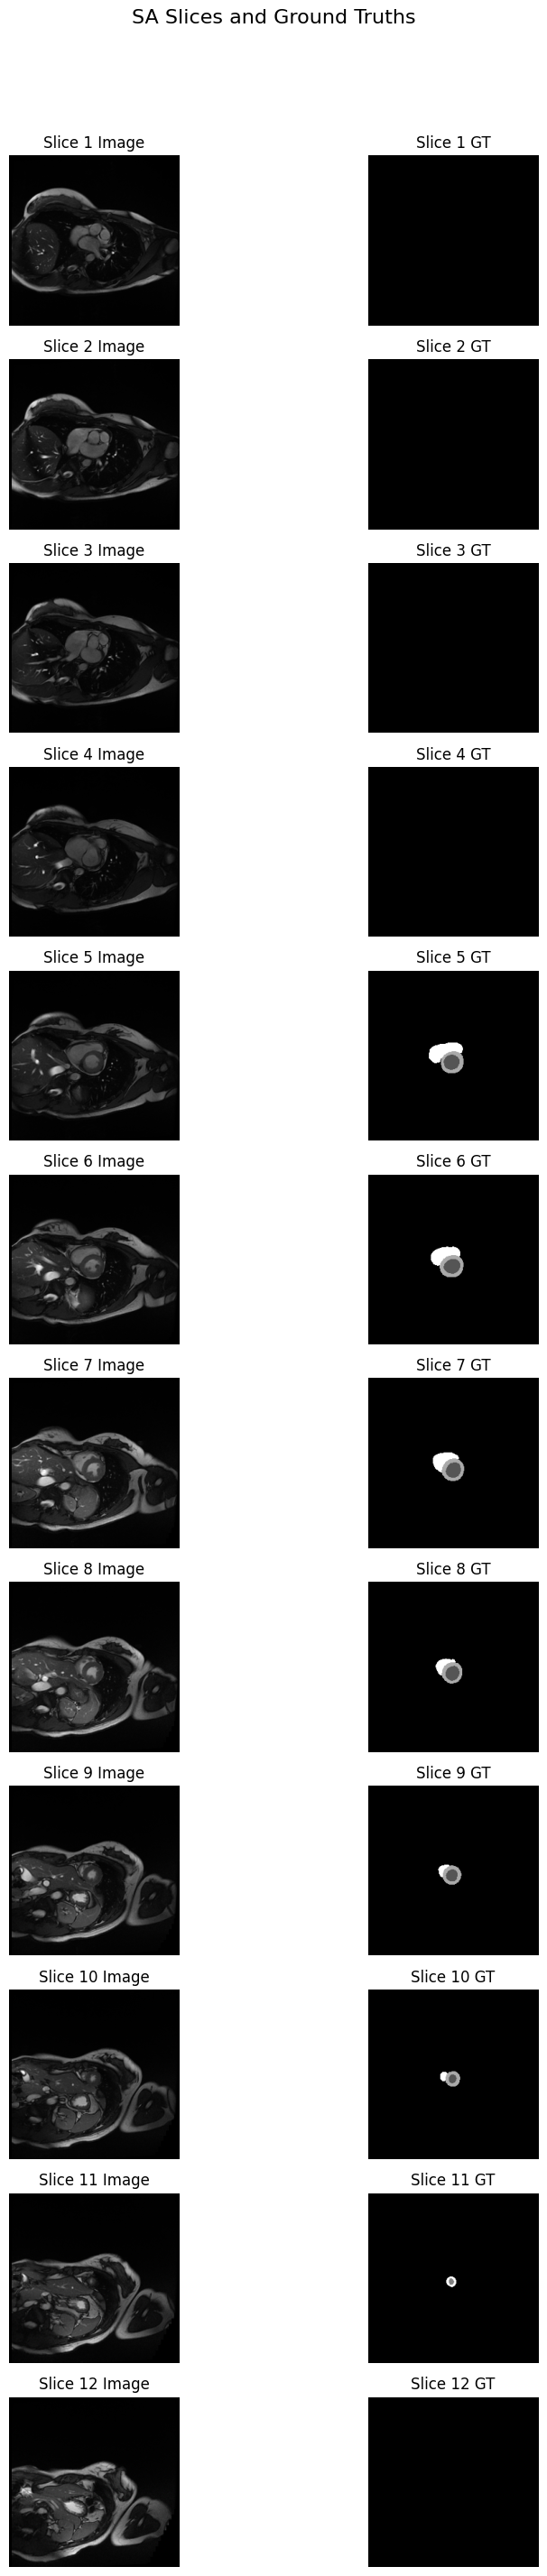

In [18]:
get_case_info(files, 1)
plot_case(files, 1, "ed")
plot_case(files, 1, "es")